In [1]:
from functions import BinPacking, BinPackingNewApproach, new_eq_optimal,  get_figure, interpret, eval_constrains
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CplexOptimizer, MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA
import numpy as np

from qiskit import Aer
backend = Aer.get_backend("qasm_simulator")

In [2]:
# np.random.seed(1)
num_items = 5 # number of items
num_bins = num_items # maximum number of bins
max_weight = 15 # max weight of a bin
cases = 10
solutions_new = {}
optimal_new = []
ratio_new = []; new =[]
result_classical = []; result_qaoa_new = []
weights=[]
qaoa = MinimumEigenOptimizer(QAOA(optimizer=COBYLA(maxiter=100), reps=4, quantum_instance=backend))
for i in range(cases): # Testing 5 different randomly selected configurations of the problem
    print(f"----------- Case {i+1} -------------")
    weights.append(np.random.randint(1, max_weight, num_items)) # Randomly picking the item weight
    qubo_new = BinPackingNewApproach(num_items, num_bins, weights[-1], max_weight, alpha=1, simplification=True)
    qubo_classical, qp = BinPacking(num_items, num_bins, weights[-1], max_weight, simplification=True)
    result_classical.append(CplexOptimizer().solve(qubo_classical))
    optimal_new.append(new_eq_optimal(qubo_new, qubo_classical))
    result_qaoa_new.append(CplexOptimizer().solve(qubo_new))
    solutions_new = result_qaoa_new[-1].fval
    new.append(solutions_new)
    check_const = eval_constrains(qp, result_qaoa_new[-1])
    print(check_const)
#     ratio_new.append(solutions_new / optimal_new[-1] - 1 < 5e-2 and check_const)

----------- Case 1 -------------
[ 1.  1.  1.  1.  0. 13. 11.  0.  0.]
----------- Case 2 -------------
[ 1.  1.  1.  1. 10. 14.  0.  0.  0.]
----------- Case 3 -------------
[ 1.  1.  1.  1.  6. 14. 11.  0.  0.]
----------- Case 4 -------------
[ 1.  1.  1.  1. 12. 13.  0.  0.  0.]
----------- Case 5 -------------
[ 1.  1.  1.  1.  7. 11. 11.  0.  0.]
----------- Case 6 -------------
[ 1.  1.  1.  1.  0.  9. 13.  0.  0.]
----------- Case 7 -------------
[ 1.  1.  1.  1. 10. 15.  0.  0.  0.]
----------- Case 8 -------------
[ 1.  1.  1.  1.  0. 10. 10. 13.  0.]
----------- Case 9 -------------
[ 1.  1.  1.  1.  7. 16. 13.  0.  0.]
----------- Case 10 -------------
[ 1.  1.  1.  1.  0. 14. 11. 11.  0.]


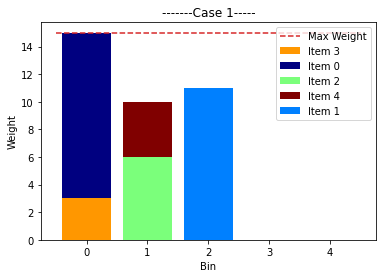

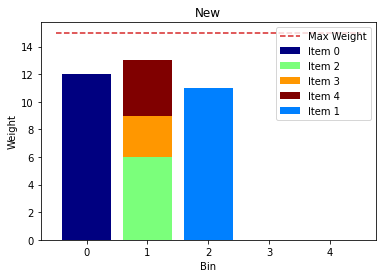

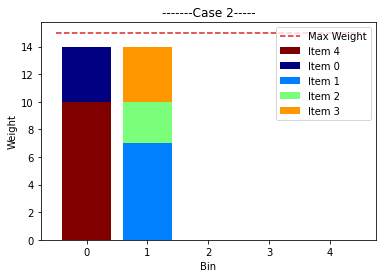

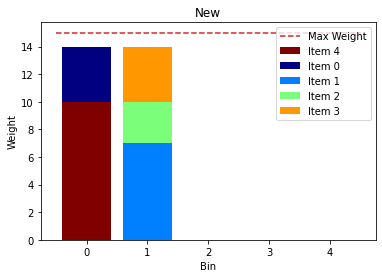

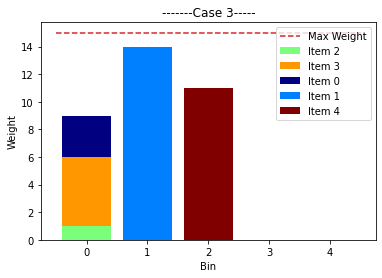

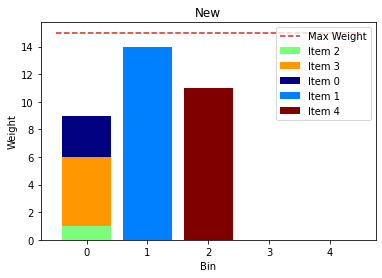

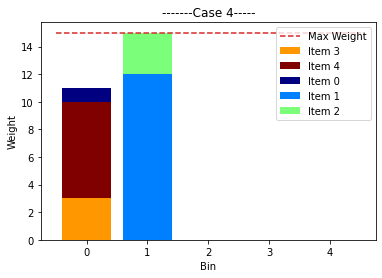

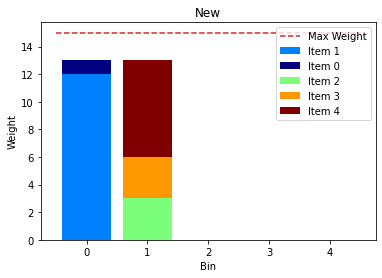

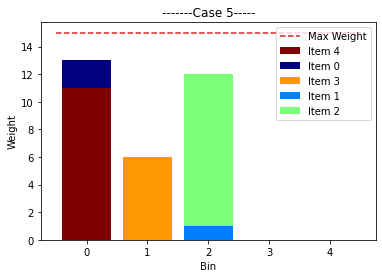

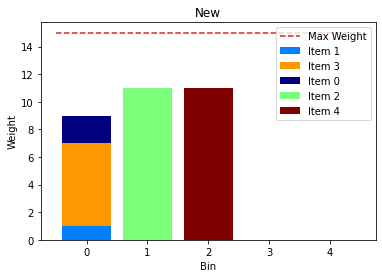

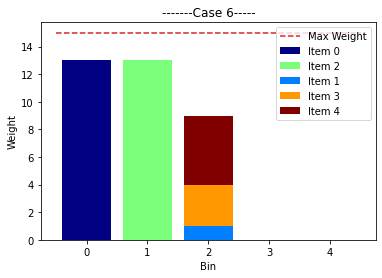

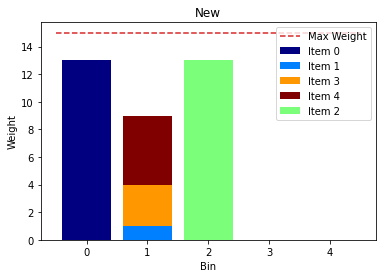

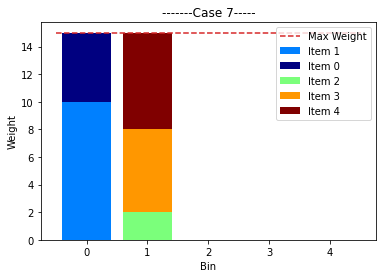

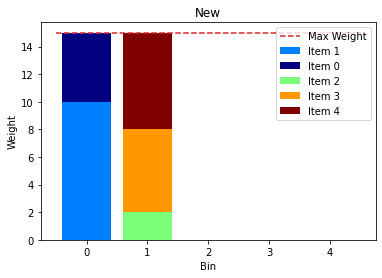

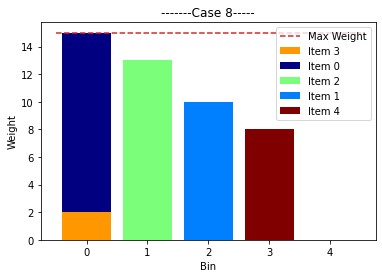

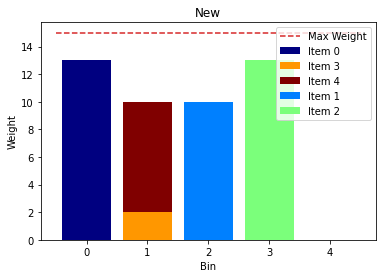

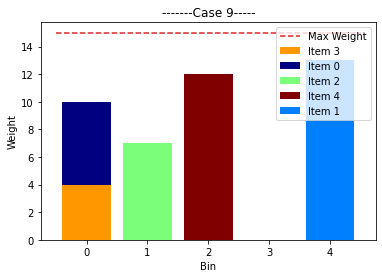

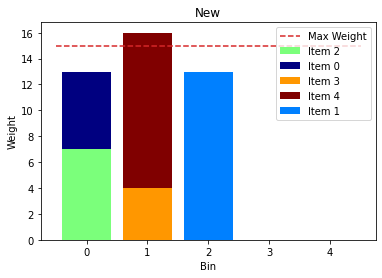

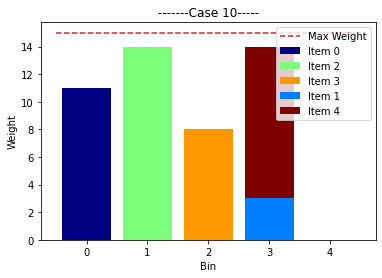

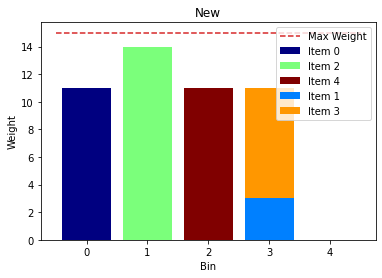

In [9]:
for i in range(len(result_classical)):
    fig = get_figure(interpret(result_classical[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title=f"-------Case {i+1}-----")
    fig = get_figure(interpret(result_qaoa_new[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title="New")

In [15]:
ratio_new

[True, True, True, True, True, True, True, True, True, True]